#### 1. IMPORTING ALL REQUIRED LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('Solarize_Light2')

from imblearn.over_sampling import RandomOverSampler

def add_bar_labels(ax):
    #ax = plt.gca()
    for i in ax.patches:
        ax.text(i.get_x() + i.get_width() / 2., i.get_height(), 
                '%d' % int(i.get_height()), fontsize=10,
                ha="center", va='bottom')

#### 2. IMPORTING DATASET

In [3]:
df = pd.read_csv("data.csv")

In [4]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


 - id: Unique ID for the customer
 - Gender: Gender of the customer
 - Age: Age of the customer
 - Driving_License: [0 : Customer does not have DL, 1 : Customer already has DL]
 - Region_Code: Unique code for the region of the customer
 - Previously_Insured: [1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance]
 - Vehicle_Age: Age of the Vehicle
 - Vehicle_Damage: [1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.]
 - Annual_Premium: The amount customer needs to pay as premium in the year
 - Policy_Sales_Channel: Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
 - Vintage: Number of Days, Customer has been associated with the company
 - Response: [1 : Customer is interested, 0 : Customer is not interested]

#### 3. EXPLORATORY DATA ANALYSIS

In [6]:
for i in df.columns:
    print(i)

id
Gender
Age
Driving_License
Region_Code
Previously_Insured
Vehicle_Age
Vehicle_Damage
Annual_Premium
Policy_Sales_Channel
Vintage
Response


In [7]:
df.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [9]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [11]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


##### 3.1 ANALYZING RESPONSE (OUTPUT COLUMNS) 

In [4]:
# checking distribution for target column
df['Response'].value_counts()

Response
0    334399
1     46710
Name: count, dtype: int64

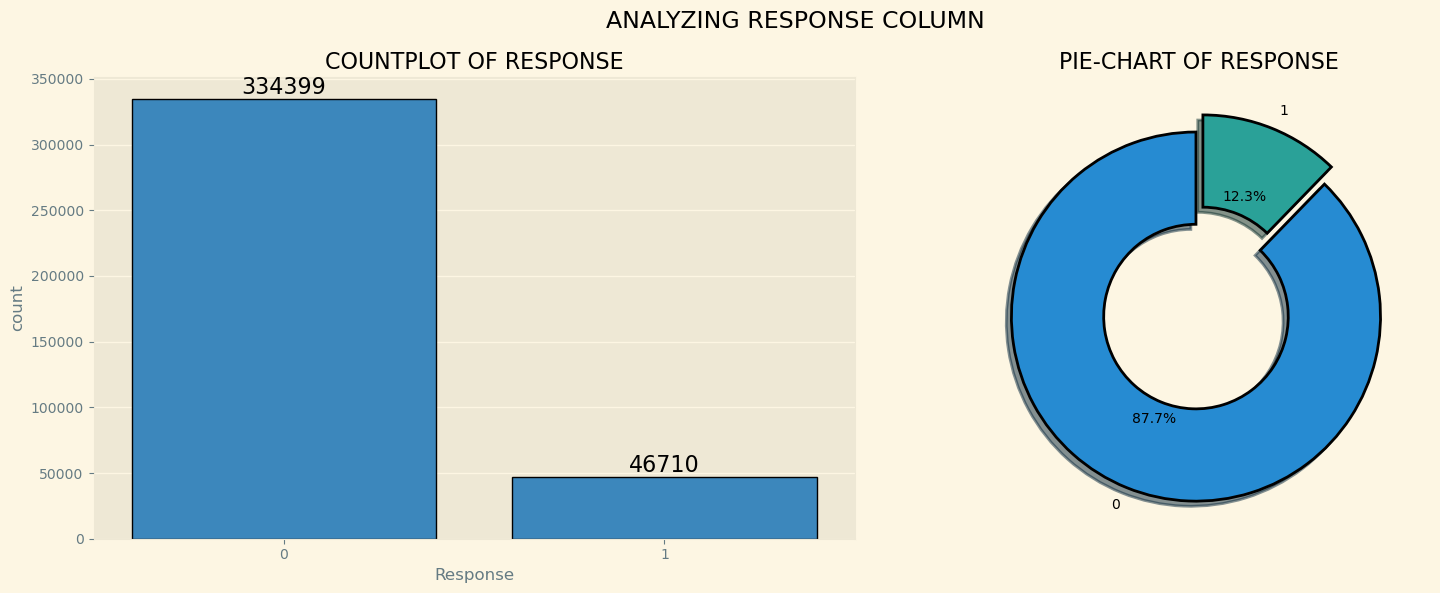

In [20]:
f, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.countplot(data=df, x='Response',ax=ax[0], edgecolor='black')
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=16)
ax[0].set_title("COUNTPLOT OF RESPONSE")   

ax[1].pie(x=df['Response'].value_counts(),
          labels=df['Response'].value_counts().index,
         explode=[0.05, 0.05],
         autopct='%1.1f%%',
        shadow=True,
        startangle=90, 
        wedgeprops={'edgecolor':'black', 'linewidth':2, 'width':0.5})

ax[1].set_title("PIE-CHART OF RESPONSE")

plt.suptitle("ANALYZING RESPONSE COLUMN", size=17)
plt.tight_layout()
plt.show()


##### 3.2 ANALYZING 'AGE' COLUMN

In [34]:
unique_ages = df['Age'].unique()
unique_ages.sort()
print(unique_ages)

[20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43
 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67
 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85]


Text(0, 0.5, 'FREQUENCY')

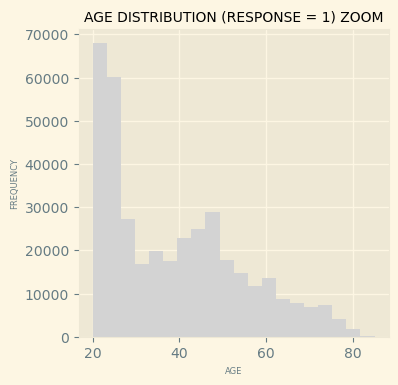

In [84]:
plt.figure(figsize=(4, 4))  # Optional: set figure size
df['Age'].hist(bins=20, color='lightgray')
plt.title('AGE DISTRIBUTION (RESPONSE = 1) ZOOM', fontsize=10)
plt.xlabel('AGE', fontsize=6)
plt.ylabel('FREQUENCY', fontsize=6)

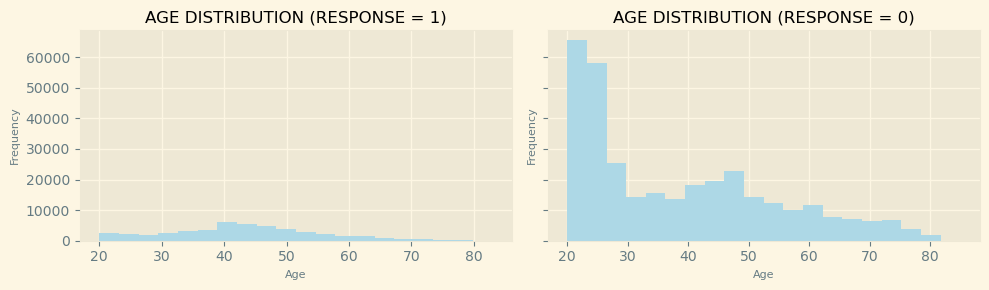

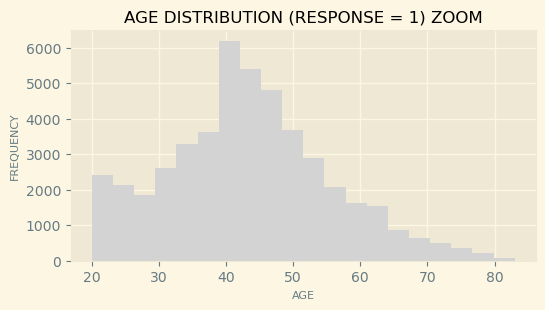

In [87]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3), sharey=True)  # sharey keeps Y-axis scale same

# Plot for Response == 1
axes[0].hist(df[df['Response'] == 1]['Age'], bins=20, color='lightblue')
axes[0].set_title('AGE DISTRIBUTION (RESPONSE = 1)', fontsize=12)
axes[0].set_xlabel('Age', fontsize=8)
axes[0].set_ylabel('Frequency', fontsize=8)
axes[0].grid(True)

# Plot for Response == 0
axes[1].hist(df[df['Response'] == 0]['Age'], bins=20, color='lightblue')
axes[1].set_title('AGE DISTRIBUTION (RESPONSE = 0)', fontsize=12)
axes[1].set_xlabel('Age', fontsize=8)
axes[1].set_ylabel('Frequency', fontsize=8)
axes[1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 3))  # Optional: set figure size
df[df['Response'] == 1]['Age'].hist(bins=20, color='lightgray')
plt.title('AGE DISTRIBUTION (RESPONSE = 1) ZOOM', fontsize=12)
plt.xlabel('AGE', fontsize=8)
plt.ylabel('FREQUENCY', fontsize=8)

plt.show()


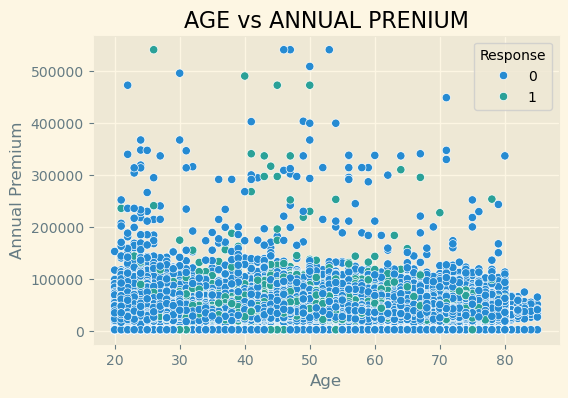

In [90]:
# Scatter Plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Age', y='Annual_Premium', data=df, hue='Response')
plt.title('AGE vs ANNUAL PRENIUM')
plt.xlabel('Age')
plt.ylabel('Annual Premium')
plt.show()


##### 3.3 ANALYZING 'GENDER' COLUMN

In [92]:
df['Gender'].value_counts()

Gender
Male      206089
Female    175020
Name: count, dtype: int64

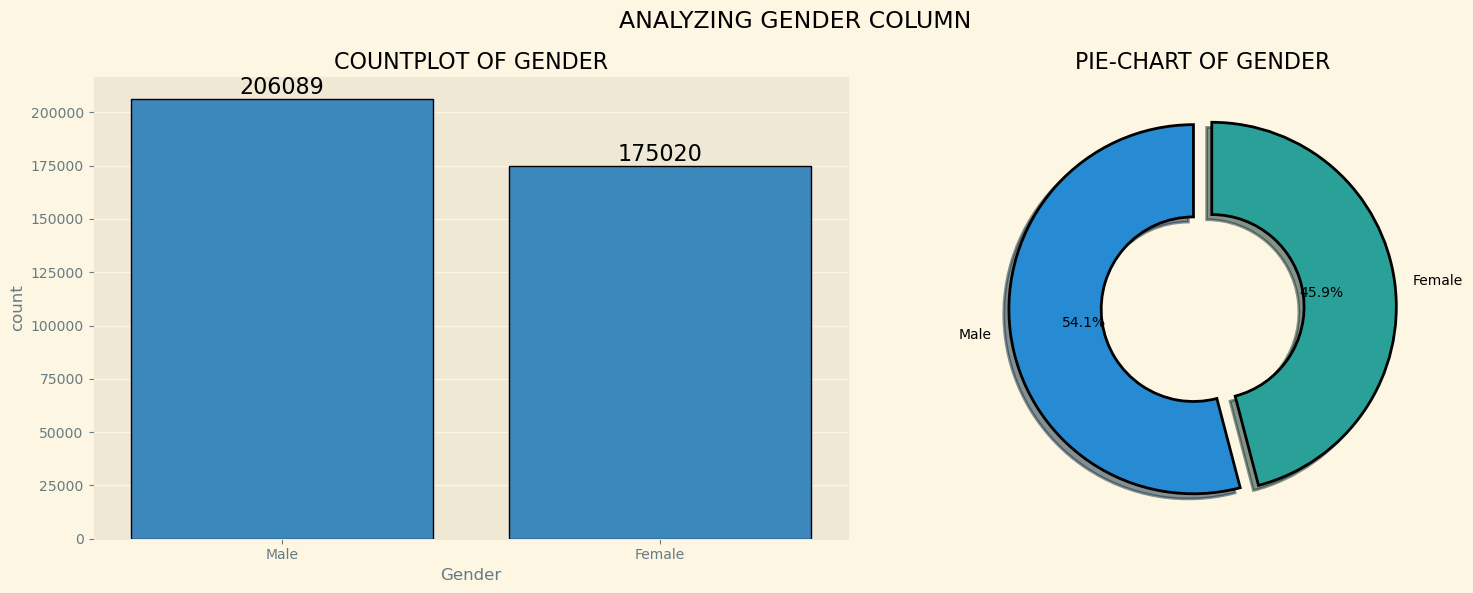

In [93]:
f, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.countplot(data=df, x='Gender',ax=ax[0], edgecolor='black')
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=16)
ax[0].set_title("COUNTPLOT OF GENDER")   

ax[1].pie(x=df['Gender'].value_counts(),
          labels=df['Gender'].value_counts().index,
         explode=[0.05, 0.05],
         autopct='%1.1f%%',
        shadow=True,
        startangle=90, 
        wedgeprops={'edgecolor':'black', 'linewidth':2, 'width':0.5})

ax[1].set_title("PIE-CHART OF GENDER")

plt.suptitle("ANALYZING GENDER COLUMN", size=17)
plt.tight_layout()
plt.show()

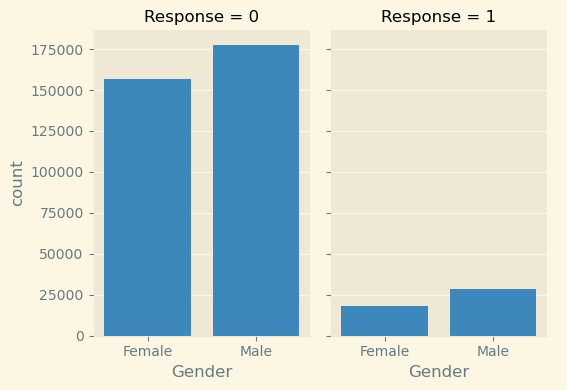

In [94]:
data = df.groupby(['Gender','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()

g = sns.catplot(x="Gender", y="count",col="Response", data=data, kind="bar", height=4, aspect=.7);

In [95]:

# checking stats for Annual_Premium
df['Annual_Premium'].describe()

count    381109.000000
mean      30564.389581
std       17213.155057
min        2630.000000
25%       24405.000000
50%       31669.000000
75%       39400.000000
max      540165.000000
Name: Annual_Premium, dtype: float64

<Axes: >

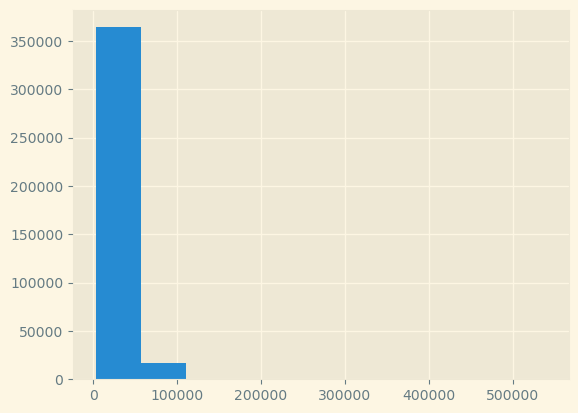

In [96]:

df['Annual_Premium'].hist(bins=10)

In [97]:
df[df['Annual_Premium']>200000]


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
1412,1413,Female,41,1,28.0,0,1-2 Year,Yes,267698.0,124.0,63,1
11319,11320,Female,50,1,46.0,1,1-2 Year,No,508073.0,26.0,192,0
13426,13427,Female,47,1,28.0,0,1-2 Year,Yes,301762.0,124.0,22,0
15024,15025,Female,32,1,28.0,0,1-2 Year,Yes,315565.0,155.0,150,0
25532,25533,Male,50,1,28.0,0,1-2 Year,Yes,229935.0,122.0,64,1
...,...,...,...,...,...,...,...,...,...,...,...,...
368263,368264,Female,25,1,28.0,1,< 1 Year,Yes,346982.0,124.0,74,0
371910,371911,Female,23,1,37.0,1,< 1 Year,No,235683.0,152.0,246,0
372492,372493,Male,46,1,18.0,0,1-2 Year,No,220581.0,26.0,210,0
373415,373416,Male,56,1,28.0,0,1-2 Year,No,337573.0,26.0,239,0


#### 4. DATA PREPROCESSING

In [100]:
df.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [103]:
obj = (df.dtypes == 'object')
obj_list = list(obj[obj].index)
print("No. of parameter with categorical value :- ",len(obj_list))
print(obj_list)

print('-'*120)

inte = (df.dtypes == 'int64')
int_list = list(inte[inte].index)
print("No. of parameter with integer value :- ",len(int_list))
print(int_list)

print('-'*120)

inte = (df.dtypes == 'float64')
int_list = list(inte[inte].index)
print("No. of parameter with floating value :- ",len(int_list))
print(int_list)

No. of parameter with categorical value :-  3
['Gender', 'Vehicle_Age', 'Vehicle_Damage']
------------------------------------------------------------------------------------------------------------------------
No. of parameter with integer value :-  6
['id', 'Age', 'Driving_License', 'Previously_Insured', 'Vintage', 'Response']
------------------------------------------------------------------------------------------------------------------------
No. of parameter with floating value :-  3
['Region_Code', 'Annual_Premium', 'Policy_Sales_Channel']
